In [2]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from requests.auth import HTTPBasicAuth
import geopandas as gpd
import data_processing.api
import data_processing.jbv_api as jbv_api
import data_processing.jbv_process as jbv_process
import geopandas as gpd
import csv

aiqu9neigheigaebeeP8nohh4kiengei Jordbruksverket


In [18]:
# Define the API endpoint
url = "https://api.jordbruksverket.se/rest/povapi/skadegorare/alla"

# Define the username and password for authentication
username = "aiqu9neigheigaebeeP8nohh4kiengei"
password = "Jordbruksverket"

# Make the API call with Basic Authentication
response = requests.get(url, auth=HTTPBasicAuth(username, password))

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Convert the JSON data into a DataFrame
    df = pd.DataFrame(data)
    
    # Display the DataFrame
    print(df)
else:
    print(f"Error: {response.status_code} - {response.text}")


                        0
0       Adelphocoris spp.
1    Adoxophyes orana    
2              Alternaria
3           Apolygus spp.
4               Apotecier
..                    ...
194       Övriga Bladlöss
195     Övriga Jordloppor
196         Övriga larver
197      Övriga Stinkflyn
198         Övriga vivlar

[199 rows x 1 columns]


In [19]:
from pyproj import Proj, transform

sweref99_tm = Proj('EPSG:3006')  # SWEREF 99 TM
wgs84 = Proj('EPSG:4326')  # WGS84

Northing = 483000  
Easting = 6209000  
longitude, latitude = transform(sweref99_tm, wgs84, Easting, Northing)

print(f"Decimal degrees (DD): {latitude:.5f}, {longitude:.5f}")


Decimal degrees (DD): 14.72724, 56.02594


C:\Users\Mahmu\AppData\Local\Temp\ipykernel_2276\3585612193.py:8: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  longitude, latitude = transform(sweref99_tm, wgs84, Easting, Northing)


In [20]:
from pyproj import Transformer

sweref99_tm = 'EPSG:3006'
wgs84 = 'EPSG:4326'
transformer = Transformer.from_crs(sweref99_tm, wgs84, always_xy=False)

Northing = 6209000  
Easting = 483000 
latitude, longitude = transformer.transform(Northing, Easting)

print(f"Decimal degrees (DD): {latitude:.5f}, {longitude:.5f}")


Decimal degrees (DD): 56.02594, 14.72724


In [21]:
import api 
api.get_gradings()

ModuleNotFoundError: No module named 'api'

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

parent_dir = os.path.relpath("../")

sys.path.append(parent_dir)

import api
import csv

import geopandas as gpd


aiqu9neigheigaebeeP8nohh4kiengei Jordbruksverket


In [ ]:
SMHI_URI = {
    "all_parameters": "https://opendata-download-metobs.smhi.se/api/version/latest/parameter.json",
    "all_stations": "https://opendata-download-metobs.smhi.se/api/version/latest/parameter",
}

In [ ]:
from_date = '2020-01-01'
to_date = '2021-01-01'
param_id = "19"

In [ ]:
gradings_df = api.get_gradings(from_date=str(from_date), to_date=str(to_date), crop="Höstvete", pest="svartpricksjuka")


In [ ]:
jbv_gdf = gpd.GeoDataFrame(gradings_df, geometry=gpd.points_from_xy(gradings_df.longitud, gradings_df.latitud), crs="EPSG:3006")
jbv_gdf["geometry"] = jbv_gdf["geometry"].to_crs("EPSG:4326")
jbv_gdf

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla,geometry
0,Gotland,False,Vårvete,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6353000,704000,True,2018-09-22,2019,Julius,NaN,NaN,POINT (18.3839 57.27438)
1,Uppsala,False,Höstvete,Vårkorn,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Uppsala län,6648000,646000,False,2019-09-05,2020,Norin,False,2020-04-06,POINT (17.61353 59.94348)
2,Uppsala,False,Vårvete,Vårkorn,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Uppsala län,6626000,611000,False,2019-09-22,2020,Julius,False,2020-04-13,POINT (16.97576 59.75697)
3,Västmanland,False,Vårkorn,Vårkorn,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Västmanlands län,6609000,594000,False,2019-09-24,2020,Julius,False,2020-04-20,POINT (16.66574 59.60858)
4,Västra Östergötland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Östergötlands län,NaN,NaN,NaN,NaN,2020,Informer,NaN,2020-09-10,POINT EMPTY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Östra Östergötland,False,Höstvete,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Östergötlands län,6485000,585000,False,2019-09-11,2020,Linus,False,NaN,POINT (16.45836 58.49729)
282,Östra Östergötland,False,Höstkorn,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Styv lera (>40 % ler),Östergötlands län,6487988.000,585403.000,False,2019-09-10,2020,Linus,NaN,NaN,POINT (16.46639 58.52404)
283,Östra Östergötland,False,Höstvete,Träda,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Östergötlands län,6492682.000,587114.000,False,2019-09-13,2020,Informer,False,NaN,POINT (16.49755 58.56585)
284,Östra Östergötland,False,Vårraps,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Östergötlands län,6493926.000,578458.000,True,2019-09-22,2020,Mariboss,NaN,NaN,POINT (16.34923 58.57866)


In [ ]:
countries = ".\\geodata\\ne_110m_admin_0_countries\\ne_110m_admin_0_countries.shp"
world = gpd.read_file(countries)
world

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [ ]:
sweden_boundary = world[world['NAME'] == 'Sweden']
sweden_boundary.to_crs("EPSG:4326")

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
110,Admin-0 country,1,3,Sweden,SWE,0,2,Sovereign country,1,Sweden,...,None,None,None,None,None,None,None,None,None,"POLYGON ((11.02737 58.85615, 11.46827 59.43239..."


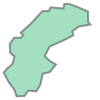

In [ ]:
sweden_boundary.geometry.union_all()

In [ ]:
print(jbv_gdf.shape)

(286, 17)


In [ ]:
jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())

0      False
1       True
2       True
3       True
4      False
       ...  
281     True
282     True
283     True
284     True
285    False
Length: 286, dtype: bool

In [ ]:
print(jbv_gdf.shape)
print(jbv_gdf.shape)
print(jbv_gdf[jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())].shape)
print(jbv_gdf[~jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())].shape)

(286, 17)
(227, 17)
(59, 17)


In [ ]:
jbv_gdf[~jbv_gdf.geometry.within(sweden_boundary.geometry.union_all())]

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla,geometry
0,Gotland,False,Vårvete,Höstraps,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6353000,704000,True,2018-09-22,2019,Julius,NaN,NaN,POINT (18.3839 57.27438)
4,Västra Östergötland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Östergötlands län,NaN,NaN,NaN,NaN,2020,Informer,NaN,2020-09-10,POINT EMPTY
5,Blekinge,False,Höstraps,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6214000,477000,True,2019-09-27,2020,Informer,NaN,NaN,POINT (14.63055 56.07061)
6,Blekinge,False,Potatis,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,478000,True,2019-09-20,2020,Mariboss,NaN,NaN,POINT (14.64628 56.1066)
15,Gotland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Gotlands län,6351000,696000,NaN,NaN,2020,NaN,NaN,NaN,POINT (18.24986 57.25995)
16,Gotland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Gotlands län,6353000,704000,NaN,NaN,2020,NaN,NaN,NaN,POINT (18.3839 57.27438)
17,Gotland,False,NaN,NaN,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Gotlands län,6353000,709000,NaN,NaN,2020,NaN,NaN,NaN,POINT (18.46666 57.27213)
18,Gotland,False,Majs,Åkerböna,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6387000,702000,True,2019-09-26,2020,Julius,NaN,NaN,POINT (18.37879 57.58016)
19,Gotland,False,Vårkorn,Potatis,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Leriga jordar (5-15 % ler),Gotlands län,6388000,702000,True,2019-09-27,2020,Julius,NaN,NaN,POINT (18.37962 57.58913)
34,Kalmar,False,Höstvete,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,NaN,Kalmar län,6266000,572000,True,2019-09-19,2020,Hereford,NaN,NaN,POINT (16.17063 56.53285)


In [ ]:
filtered_gdf = jbv_gdf[jbv_gdf['latitud'].notna() & jbv_gdf['longitud'].notna()]
print(filtered_gdf.shape)

(277, 17)


In [22]:
crop='höstvete'
pest = 'Svartpricksjuka'
data_df = jbv_api.get_gradings(from_date="2015-08-04", to_date="2025-02-01", crop=crop, pest=pest)

In [ ]:
data_df = jbv_process.drop_rows_no_coords(data_df)
data_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
1,Blekinge,False,Potatis,Övrigt,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Blekinge län,6227000,544000,True,2015-10-03,2016,Brons,NaN,NaN
2,Blekinge,False,Höstvete,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6227000,544000,True,2015-09-26,2016,Cubus,NaN,NaN
3,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6230000,506000,True,2015-09-12,2016,Brons,NaN,NaN
4,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Sandjord (<5 % ler),Blekinge län,6233000,507000,True,2015-09-12,2016,Mariboss,NaN,NaN


In [1]:
import data_processing.api
import data_processing.jbv_api as jbv_api
import data_processing.jbv_process as jbv_process

aiqu9neigheigaebeeP8nohh4kiengei Jordbruksverket


In [30]:
crop='höstvete'
pest = 'Svartpricksjuka'
data_df = jbv_api.get_gradings(from_date="2015-08-04", to_date="2025-02-01", crop=crop, pest=pest)
print("---FETCHED JBV-DATA")

---FETCHED JBV-DATA


In [31]:
data_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
1,Blekinge,False,Potatis,Övrigt,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Mellanlera (25-40 % ler),Blekinge län,6227000,544000,True,2015-10-03,2016,Brons,NaN,NaN
2,Blekinge,False,Höstvete,Höstvete,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6227000,544000,True,2015-09-26,2016,Cubus,NaN,NaN
3,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6230000,506000,True,2015-09-12,2016,Brons,NaN,NaN
4,Blekinge,False,Höstkorn,Oljeväxter,[{'graderingList': [{'matmetod': '% ang blad 1...,Höstvete,Sandjord (<5 % ler),Blekinge län,6233000,507000,True,2015-09-12,2016,Mariboss,NaN,NaN


In [44]:
exploded_df = data_df.explode('graderingstillfalleList')


In [14]:
temp_df = pd.json_normalize(exploded_df['graderingstillfalleList'])
combined_df = pd.concat([exploded_df.reset_index(drop=True)[['groda', 'latitud', 'longitud']], temp_df], axis=1)
combined_df.head()

,groda,latitud,longitud,graderingList,graderingsdatum,graderingstyp,utvecklingsstadium
0,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-18,Veckovis,24
1,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-25,Veckovis,30
2,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-02,Veckovis,30
3,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-09,Veckovis,31
4,Höstvete,6218000,479000,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-16,Veckovis,32


In [17]:
grading_df = pd.json_normalize(combined_df['graderingList'])
grading_df.head()

,0,1
0,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
2,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
3,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
4,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None


In [29]:
result_df = pd.concat([combined_df.reset_index(drop=True)[['groda', 'latitud', 'longitud', 'graderingsdatum', 'utvecklingsstadium']], grading_df], axis=1)
result_df.head()

,groda,latitud,longitud,graderingsdatum,utvecklingsstadium,0,1
0,Höstvete,6218000,479000,2016-04-18,24,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1,Höstvete,6218000,479000,2016-04-25,30,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
2,Höstvete,6218000,479000,2016-05-02,30,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
3,Höstvete,6218000,479000,2016-05-09,31,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
4,Höstvete,6218000,479000,2016-05-16,32,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None


In [26]:
print(result_df.shape)

(21762, 7)


In [27]:
result_df['graderingsdatum'] = pd.to_datetime(result_df['graderingsdatum'])
result_df = result_df.sort_values(by='graderingsdatum')
result_df.head()

,groda,latitud,longitud,graderingsdatum,utvecklingsstadium,0,1
1247,Höstvete,6143000,450000,2016-04-11,22,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1176,Höstvete,6177000,382000,2016-04-18,23,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1187,Höstvete,6183000,383000,2016-04-18,22,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
1211,Höstvete,6141000,447000,2016-04-18,23,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None
151,Höstvete,6274000,374000,2016-04-18,23,"{'matmetod': '% ang blad 1–3', 'skadegorare': ...",None


In [83]:
exploded_df = data_df.explode('graderingstillfalleList')
exploded_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,graderingstillfalleList,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,{'graderingList': [{'matmetod': '% ang blad 1–...,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN


In [84]:
normalized_gradering = pd.json_normalize(exploded_df['graderingstillfalleList'])
normalized_gradering

,graderingList,graderingsdatum,graderingstyp,utvecklingsstadium
0,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-18,Veckovis,24
1,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-25,Veckovis,30
2,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-02,Veckovis,30
3,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-09,Veckovis,31
4,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-16,Veckovis,32
...,...,...,...,...
21757,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-05-06,Veckovis,22
21758,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-05-13,Veckovis,23
21759,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-04-29,Veckovis,23
21760,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2024-05-06,Veckovis,30


In [85]:
ng2 = normalized_gradering.explode('graderingList')
pd.json_normalize(ng2['graderingList'])

,matmetod,skadegorare,varde
0,% ang blad 1–3,Svartpricksjuka,33.0
1,% ang blad 1–3,Svartpricksjuka,6.0
2,% ang blad 1–3,Svartpricksjuka,4.0
3,% ang blad 1–3,Svartpricksjuka,3.0
4,% ang blad 1–3,Svartpricksjuka,3.0
...,...,...,...
22523,% ang blad 1–3,Svartpricksjuka,14.0
22524,% ang blad 1–3,Svartpricksjuka,0.0
22525,% ang blad 1–3,Svartpricksjuka,34.0
22526,% ang blad 1–3,Svartpricksjuka,18.0


In [86]:
exploded_df = exploded_df.drop(columns=['graderingstillfalleList'])
ng2 = ng2.drop(columns=['graderingList'])

In [87]:
exploded_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN


In [88]:
combined_df = pd.concat([exploded_df.reset_index(drop=True), normalized_gradering.reset_index(drop=True)], axis=1)
combined_df.head()

,delomrade,ekologisk,forforfrukt,forfrukt,groda,jordart,lan,latitud,longitud,plojt,sadatum,skordear,sort,broddbehandling,utplaceringsdatumFalla,graderingList,graderingsdatum,graderingstyp,utvecklingsstadium
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-18,Veckovis,24
1,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-04-25,Veckovis,30
2,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-02,Veckovis,30
3,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-09,Veckovis,31
4,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,2015-09-26,2016,Mariboss,NaN,NaN,"[{'matmetod': '% ang blad 1–3', 'skadegorare':...",2016-05-16,Veckovis,32


In [95]:
import pandas as pd

# Step 1: Explode the 'graderingstillfalleList' column
exploded_df = data_df.explode('graderingstillfalleList')

# Step 2: Normalize the 'graderingstillfalleList' column
normalized_gradering = pd.json_normalize(exploded_df['graderingstillfalleList'])

# Step 3: Explode and normalize the 'graderingList' column (if it exists)
if 'graderingList' in normalized_gradering.columns:
    # Explode the 'graderingList' column
    ng2 = normalized_gradering.explode('graderingList')
    
    # Normalize the 'graderingList' column
    normalized_gradering_list = pd.json_normalize(ng2['graderingList'])
    
    # Drop the original 'graderingList' column to avoid duplication
    ng2 = ng2.drop(columns=['graderingList'], errors='ignore')
else:
    # If 'graderingList' does not exist, create an empty DataFrame
    normalized_gradering_list = pd.DataFrame()

# Step 4: Concatenate all DataFrames into one big table
combined_df = pd.concat([exploded_df.reset_index(drop=True), normalized_gradering.reset_index(drop=True)], axis=1)

if not normalized_gradering_list.empty:
    combined_df = pd.concat([combined_df.reset_index(drop=True), normalized_gradering_list.reset_index(drop=True)], axis=1)

# Display the final DataFrame
combined_df.drop(columns=['graderingstillfalleList', 'graderingList']).head()

,delomrade,ekologisk,forforfrukt,forfrukt,groda,jordart,lan,latitud,longitud,plojt,...,skordear,sort,broddbehandling,utplaceringsdatumFalla,graderingsdatum,graderingstyp,utvecklingsstadium,matmetod,skadegorare,varde
0,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-04-18,Veckovis,24.0,% ang blad 1–3,Svartpricksjuka,33.0
1,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-04-25,Veckovis,30.0,% ang blad 1–3,Svartpricksjuka,6.0
2,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-05-02,Veckovis,30.0,% ang blad 1–3,Svartpricksjuka,4.0
3,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-05-09,Veckovis,31.0,% ang blad 1–3,Svartpricksjuka,3.0
4,Blekinge,False,Havre,Höstvete,Höstvete,Lättlera (15-25 % ler),Blekinge län,6218000,479000,True,...,2016.0,Mariboss,NaN,NaN,2016-05-16,Veckovis,32.0,% ang blad 1–3,Svartpricksjuka,3.0


In [ ]:
combined_df[['graderingsdatum']]

In [91]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
crop = df['groda'][0]
pest = df['skadegorare'][0]
df = df.drop(['groda', 'skadegorare'], axis=1)

In [92]:
def assign_growth_zone(geometry_str):
    coords = geometry_str.replace('POINT (', '').replace(')', '').split()
    latitude = float(coords[1]) 
    if latitude < 60.0:
        return 0 #'Southern Sweden'
    elif 60.0 <= latitude <= 64.0:
        return 1 #'Central Sweden'
    else:
        return 2 #'Northern Sweden'
df['GrowthZone'] = df['geometry'].apply(assign_growth_zone)
df.head()

,geometry,varde,utvecklingsstadium,graderingsdatum,Lufttemperatur,Nederbördsmängd,GrowthZone
0,POINT (12.85991951351458 56.13349298683893),79.75,25.25,2015-04-06,8.028571,15.1,0
1,POINT (12.763455607871052 56.131783800733665),100.00,30.00,2015-04-06,8.028571,15.1,0
2,POINT (12.940313957346367 56.13485980252406),30.00,23.00,2015-04-06,8.028571,NaN,0
3,POINT (13.121225022137113 55.724349144006126),90.00,22.00,2015-04-06,8.528571,11.9,0
4,POINT (13.134566983515384 55.77847484676893),98.00,21.00,2015-04-06,8.528571,11.9,0


In [93]:
def replace_nan_with_avg(df, column):
    for i in range(len(df)):
        if pd.isna(df.loc[i, column]): 
            if i == 0: 
                df.loc[i, column] = df.loc[i + 1, column]
            elif i == len(df) - 1: 
                df.loc[i, column] = df.loc[i - 1, column]
            else: 
                prev_val = df.loc[i - 1, column]
                next_val = df.loc[i + 1, column]
                df.loc[i, column] = (prev_val + next_val) / 2

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df[col].isna().any(): 
        replace_nan_with_avg(df, col)

df

,geometry,varde,utvecklingsstadium,graderingsdatum,Lufttemperatur,Nederbördsmängd,GrowthZone
0,POINT (12.85991951351458 56.13349298683893),79.75,25.25,2015-04-06,8.028571,15.1,0
1,POINT (12.763455607871052 56.131783800733665),100.00,30.00,2015-04-06,8.028571,15.1,0
2,POINT (12.940313957346367 56.13485980252406),30.00,23.00,2015-04-06,8.028571,13.5,0
3,POINT (13.121225022137113 55.724349144006126),90.00,22.00,2015-04-06,8.528571,11.9,0
4,POINT (13.134566983515384 55.77847484676893),98.00,21.00,2015-04-06,8.528571,11.9,0
...,...,...,...,...,...,...,...
17980,POINT (14.069255484114606 56.031714077260816),0.01,39.00,2024-05-13,15.000000,0.0,0
17981,POINT (16.717043428428315 59.571993092117644),46.00,32.00,2024-05-13,16.342857,0.0,0
17982,POINT (18.204105084726773 57.30606609394089),6.00,31.00,2024-05-13,13.057143,0.0,0
17983,POINT (16.45037328387691 56.61974745644302),8.00,32.00,2024-05-13,14.071429,0.0,0


In [94]:
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'], errors='coerce')
df['Year'] = df['graderingsdatum'].dt.year
years_to_keep = [2020]
df = df[df['Year'].isin(years_to_keep)]

In [95]:
import seaborn as sns

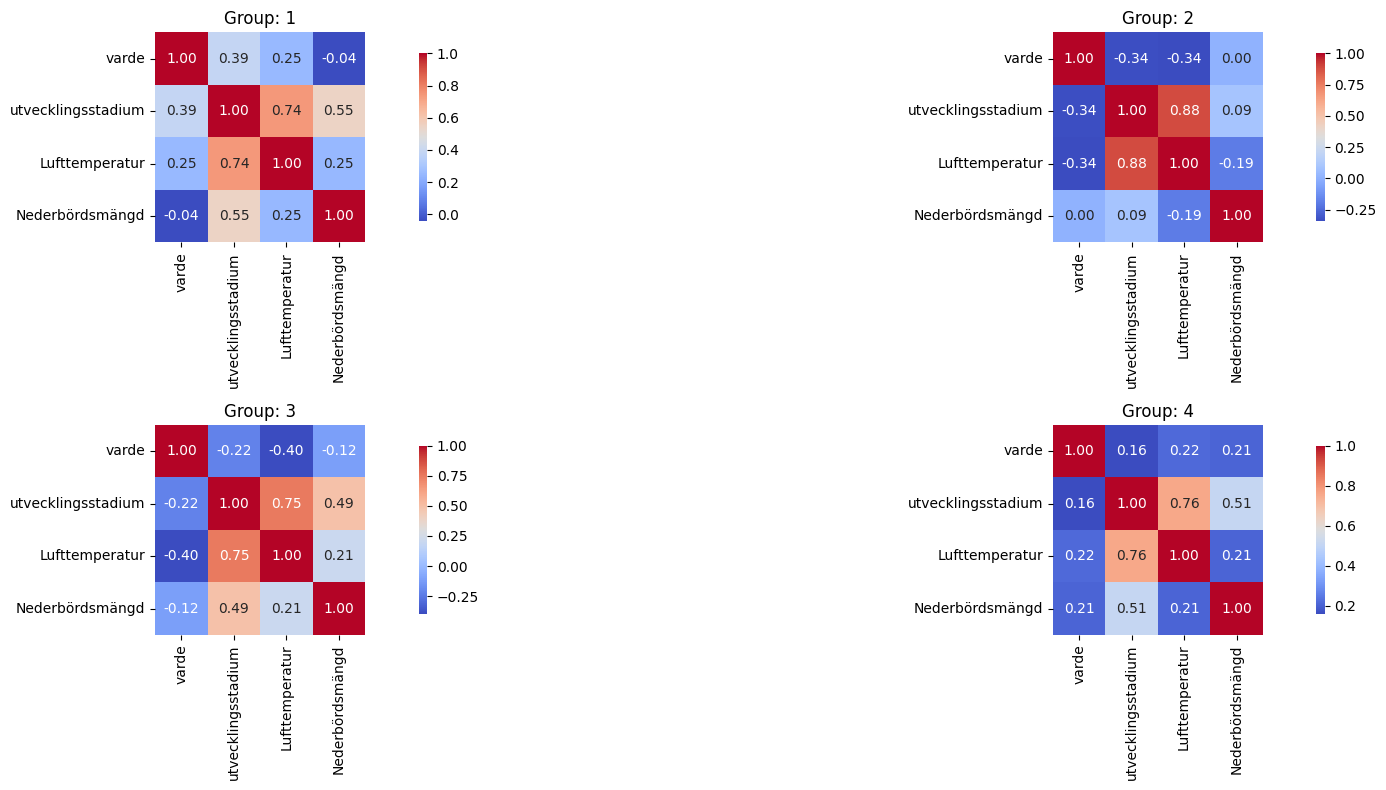

In [96]:
df.loc[:, 'GrowthZone'] = pd.to_numeric(df['GrowthZone'], errors='coerce')
df.loc[:, 'Year'] = pd.to_numeric(df['Year'], errors='coerce')

x_c = 2
y_c = 2
n = x_c * y_c

groups = df.groupby('geometry')
group_sizes = groups.size()
top_groups = group_sizes.nlargest(n).index  

fig, axes = plt.subplots(x_c, y_c, figsize=(20, 8))
axes = axes.flatten() 

for i, name in enumerate(top_groups):
    group_df = df[df['geometry'] == name].drop(columns=['geometry', 'graderingsdatum', 'Year', 'GrowthZone'], errors='ignore')
    
    corr = group_df.corr()
    
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=axes[i], cbar_kws={"shrink": .8})
    axes[i].set_title(f'Group: {i+1}')

plt.tight_layout()
plt.show()

In [3]:
data_df = pd.read_pickle("test_out.pkl")

In [6]:
data_df.head()

,graderingsdatum,ekologisk,groda,skadegorare,utvecklingsstadium,varde,Series_id,week,meassured_value,geometry,Lufttemperatur_mean,Nederbördsmängd_sum,Solskenstid_sum,Daggpunktstemperatur_mean,Relativ Luftfuktighet_mean,Lufttryck reducerat havsytans nivå_mean,Långvågs-Irradians_mean
0,2016-04-18,False,Höstvete,Svartpricksjuka,24.000000,33.000000,0.0,16,True,POINT (14.66236 56.10664),7.4,0.9,14462,NaN,NaN,1010.112500,322.871667
1,2016-04-19,False,Höstvete,Svartpricksjuka,24.857143,29.142857,0.0,16,False,POINT (14.66236 56.10664),8.3,0.3,20091,NaN,NaN,1009.875000,296.342083
2,2016-04-20,False,Höstvete,Svartpricksjuka,25.714286,25.285714,0.0,16,False,POINT (14.66236 56.10664),9.8,0.0,51103,NaN,NaN,1021.258333,252.189167
3,2016-04-21,False,Höstvete,Svartpricksjuka,26.571429,21.428571,0.0,16,False,POINT (14.66236 56.10664),7.3,0.0,31330,1.228571,64.571429,1017.316667,288.907500
4,2016-04-22,False,Höstvete,Svartpricksjuka,27.428571,17.571429,0.0,16,False,POINT (14.66236 56.10664),9.1,0.0,39769,-1.416667,53.416667,1011.429167,262.458750


In [9]:
print(data_df.shape)
data_df = data_df.dropna()
print(data_df.shape)

(113238, 17)
(113238, 17)


In [189]:
df = pd.read_csv('output.csv')
print(df.shape)

(19269, 9)


In [190]:
df = df.dropna()
print(df.shape)

(19269, 9)


In [191]:
df['graderingsdatum'] = pd.to_datetime(df['graderingsdatum'])
df['Series_id'] = df['Series_id'].astype(int)
df.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871)
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871)
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871)
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871)
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871)


In [170]:
from shapely.wkt import loads
df['geometry'] = df['geometry'].apply(loads)

In [171]:
df.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871)
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871)
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871)
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871)
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871)


In [172]:
df['latitude'] = df['geometry'].apply(lambda geom: geom.y)
df['longitude'] = df['geometry'].apply(lambda geom: geom.x)
df.drop('geometry', axis=1)

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,latitude,longitude
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,56.106642,14.662357
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,56.106642,14.662357
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,56.106642,14.662357
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,56.106642,14.662357
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,56.106642,14.662357
...,...,...,...,...,...,...,...,...,...,...
19264,False,Höstvete,Svartpricksjuka,2023-05-29,37.0,0.0,1954,22,58.596443,16.428071
19265,False,Höstvete,Svartpricksjuka,2023-06-05,45.0,2.0,1954,23,58.596443,16.428071
19266,False,Höstvete,Svartpricksjuka,2023-06-12,53.0,6.0,1954,24,58.596443,16.428071
19267,False,Höstvete,Svartpricksjuka,2023-06-19,71.0,10.0,1954,25,58.596443,16.428071


In [175]:
import pandas as pd
import requests

def get_openmeteo_weather(row):
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": row['latitude'],
        "longitude": row['longitude'],
        "start_date": row['graderingsdatum'].strftime('%Y-%m-%d'),
        "end_date": row['graderingsdatum'].strftime('%Y-%m-%d'),
        "daily": "temperature_2m_mean,temperature_2m_min,temperature_2m_max,precipitation_sum"
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()  # Raise an error for bad HTTP responses
        data = response.json()
        if 'daily' in data and data['daily']['time']:
            daily = data['daily']
            return pd.Series({
                'avg_temp': daily['temperature_2m_mean'][0],
                'min_temp': daily['temperature_2m_min'][0],
                'max_temp': daily['temperature_2m_max'][0],
                'precipitation': daily['precipitation_sum'][0]
            })
        else:
            print(f"Row {row.name}: No daily data returned for {row['graderingsdatum']}")
    except Exception as e:
        print(f"Row {row.name}: Error fetching weather data - {e}")
    return pd.Series({
        'avg_temp': float('nan'),
        'min_temp': float('nan'),
        'max_temp': float('nan'),
        'precipitation': float('nan')
    })

# Apply to test DataFrame (first 10 rows)
test = df.head(120)
weather_cols = test.apply(get_openmeteo_weather, axis=1)
test = pd.concat([test, weather_cols], axis=1)

# Display the updated DataFrame
test.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry,latitude,longitude,avg_temp,min_temp,max_temp,precipitation
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,7.1,4.2,9.7,0.1
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,3.9,1.1,6.2,1.7
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.9,3.5,13.0,0.0
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,14.6,9.6,19.4,0.0
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.4,6.9,9.8,4.0


In [176]:
last_series = np.unique(test['Series_id'])[-1]

In [119]:
test = test[test['Series_id'] != last_series]

In [178]:
test.head()

,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry,latitude,longitude,avg_temp,min_temp,max_temp,precipitation
0,False,Höstvete,Svartpricksjuka,2016-04-18,24.0,33.0,0,16,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,7.1,4.2,9.7,0.1
1,False,Höstvete,Svartpricksjuka,2016-04-25,30.0,6.0,0,17,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,3.9,1.1,6.2,1.7
2,False,Höstvete,Svartpricksjuka,2016-05-02,30.0,4.0,0,18,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.9,3.5,13.0,0.0
3,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,3.0,0,19,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,14.6,9.6,19.4,0.0
4,False,Höstvete,Svartpricksjuka,2016-05-16,32.0,3.0,0,20,POINT (14.662356797839683 56.10664183335871),56.106642,14.662357,8.4,6.9,9.8,4.0


In [179]:
test = test.drop(['graderingsdatum', 'geometry', 'ekologisk', 'groda', 'skadegorare', 'latitude', 'longitude'], axis=1)

In [180]:
savior = test.copy()
savior.head()

,utvecklingsstadium,varde,Series_id,week,avg_temp,min_temp,max_temp,precipitation
0,24.0,33.0,0,16,7.1,4.2,9.7,0.1
1,30.0,6.0,0,17,3.9,1.1,6.2,1.7
2,30.0,4.0,0,18,8.9,3.5,13.0,0.0
3,31.0,3.0,0,19,14.6,9.6,19.4,0.0
4,32.0,3.0,0,20,8.4,6.9,9.8,4.0


In [182]:
df_melted = test.melt(value_vars=['utvecklingsstadium', 'varde', 'avg_temp', 'min_temp', 'max_temp', 'precipitation'],
                    var_name='Feature', value_name='Value')

print(test.shape)
print(df_melted.shape)

(120, 8)
(720, 2)


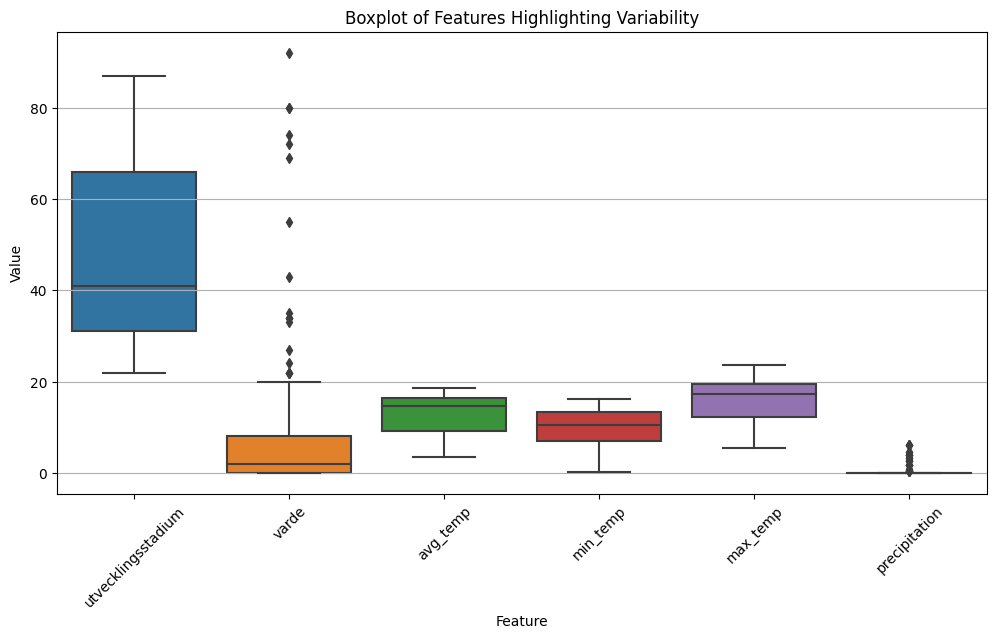

In [183]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted)
plt.title('Boxplot of Features Highlighting Variability')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

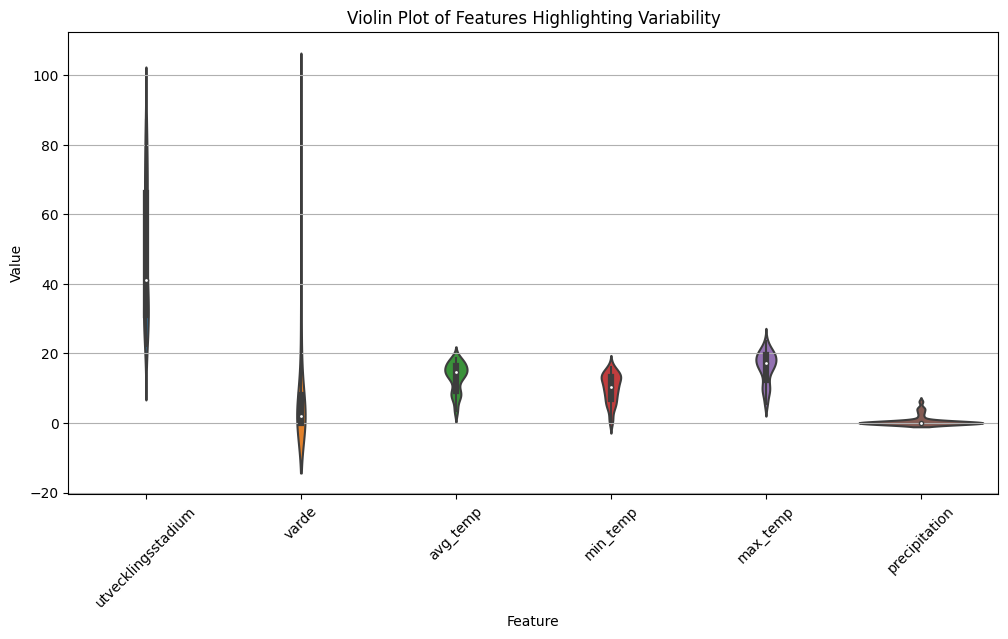

In [184]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Feature', y='Value', data=df_melted)
plt.title('Violin Plot of Features Highlighting Variability')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [238]:
import pandas as pd
import plotly.express as px
import numpy as np

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Create scatter plot with bubbles
fig = px.scatter(
    df_subset, 
    x="Series_id",  
    y="varde",    
    size="varde",   
    color="varde",
    color_continuous_scale="Viridis",
    title="Varde Distribution by 20 Random Series IDs",
    labels={"varde": "Varde Value", "Series_id": "Series ID"}
)

# Improve layout
fig.update_layout(
    height=800,
    xaxis=dict(type="category", tickmode="linear"),  # Ensure discrete x-axis
    showlegend=False
)

fig.show()


In [225]:
import pandas as pd
import plotly.express as px
import numpy as np

# Load your dataset
# df = pd.read_csv("your_data.csv")  # Uncomment if loading from a file

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Create violin plot
fig = px.violin(
    df_subset, 
    x="Series_id",  # Each Series ID is a separate category
    y="varde",       # varde determines vertical spread
    box=True,        # Show box plot inside violin for more detail
    points="all",    # Show all individual data points
    title="Varde Variability by 20 Random Series IDs",
    labels={"varde": "Varde Value", "Series_id": "Series ID"},
    color="Series_id",  # Different colors for each Series ID,
)

# Improve layout
fig.update_layout(
    height=800,
    xaxis=dict(type="category", tickmode="linear"),  # Ensure discrete x-axis
    showlegend=False
)

fig.show()


In [226]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Define a function to estimate probability distributions
def estimate_distribution(series_values, bins=20):
    """Estimate a probability distribution from a given series using histogram bins."""
    hist, bin_edges = np.histogram(series_values, bins=bins, density=True)
    hist += 1e-10  # Avoid zero probabilities
    return hist / hist.sum()  # Normalize to sum to 1

# Compute KL divergence between each pair of Series IDs
kl_divergences = {}
for id1, id2 in itertools.combinations(random_series_ids, 2):
    p = estimate_distribution(df_subset[df_subset["Series_id"] == id1]["varde"])
    q = estimate_distribution(df_subset[df_subset["Series_id"] == id2]["varde"])
    
    kl_div = stats.entropy(p, q)  # KL Divergence
    kl_divergences[(id1, id2)] = kl_div

# Print results
sorted_kl = sorted(kl_divergences.items(), key=lambda x: -x[1])  # Sort by highest divergence
for pair, value in sorted_kl[:10]:  # Show top 10 most different distributions
    print(f"KL Divergence between Series {pair[0]} and {pair[1]}: {value:.4f}")


KL Divergence between Series 1213 and 966: 18.0039
KL Divergence between Series 1213 and 1843: 17.7953
KL Divergence between Series 1213 and 396: 17.7083
KL Divergence between Series 64 and 571: 16.1616
KL Divergence between Series 64 and 966: 15.8712
KL Divergence between Series 452 and 571: 14.7233
KL Divergence between Series 452 and 966: 14.3875
KL Divergence between Series 1213 and 452: 14.2770
KL Divergence between Series 452 and 396: 14.1970
KL Divergence between Series 452 and 107: 14.0290


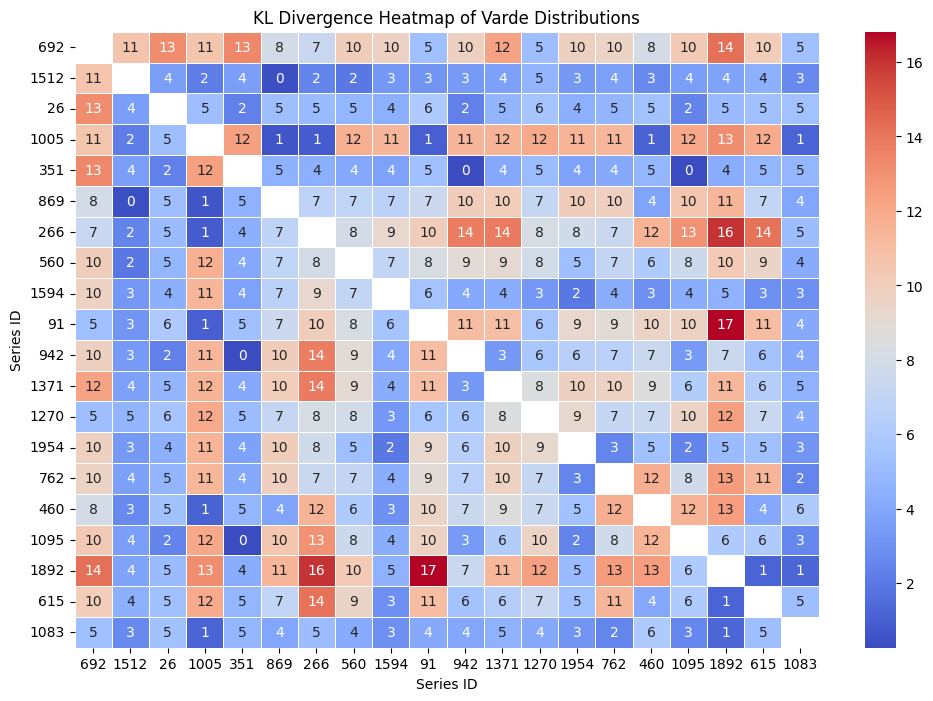

In [244]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 20 random unique Series IDs
random_series_ids = np.random.choice(df['Series_id'].unique(), size=20, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Define a function to estimate probability distributions
def estimate_distribution(series_values, bins=20):
    """Estimate a probability distribution from a given series using histogram bins."""
    hist, bin_edges = np.histogram(series_values, bins=bins, density=True)
    hist += 1e-10  # Avoid zero probabilities
    return hist / hist.sum()  # Normalize to sum to 1

# Compute KL divergence and store in a matrix
kl_matrix = pd.DataFrame(index=random_series_ids, columns=random_series_ids)

for id1, id2 in itertools.combinations(random_series_ids, 2):
    p = estimate_distribution(df_subset[df_subset["Series_id"] == id1]["varde"])
    q = estimate_distribution(df_subset[df_subset["Series_id"] == id2]["varde"])

    kl_div = stats.entropy(p, q)  # KL Divergence
    kl_matrix.loc[id1, id2] = kl_div
    kl_matrix.loc[id2, id1] = kl_div  # Make it symmetric for visualization

# Convert to float type
kl_matrix = kl_matrix.astype(float)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(kl_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".0f")
plt.title("KL Divergence Heatmap of Varde Distributions")
plt.xlabel("Series ID")
plt.ylabel("Series ID")
plt.show()


In [246]:
np.fill_diagonal(kl_matrix.values, 0)
kl_matrix

,692,1512,26,1005,351,869,266,560,1594,91,942,1371,1270,1954,762,460,1095,1892,615,1083
692,0.000000,10.646491,13.180287,10.581748,13.363420,7.935032,7.366797,10.009130,9.756776,5.338116,9.781171,12.237038,5.209265,9.779687,9.567832,7.916611,10.323815,14.162811,10.046046,5.328565
1512,10.646491,0.000000,3.572992,2.148632,3.572403,0.434911,2.417195,2.007120,3.288439,3.164379,3.418118,3.675791,4.705923,3.328603,3.690956,2.668492,3.614878,3.780068,4.394947,2.711084
26,13.180287,3.572992,0.000000,5.209004,2.312584,5.199663,5.019037,4.730996,4.378959,5.902151,2.338003,4.708891,5.588532,4.416248,4.697340,5.395001,2.427356,5.018201,5.349261,5.386511
1005,10.581748,2.148632,5.209004,0.000000,12.412432,0.623241,0.870909,11.717725,11.420505,1.040337,11.430544,11.518099,12.026264,11.469092,11.351115,1.129503,12.075950,13.146361,11.952136,1.229377
351,13.363420,3.572403,2.312584,12.412432,0.000000,4.514876,4.433950,4.075029,3.708493,5.325872,0.310152,4.080186,5.069275,3.747873,4.088064,4.784904,0.272237,4.240380,4.777854,4.777958
869,7.935032,0.434911,5.199663,0.623241,4.514876,0.000000,6.806332,6.913872,6.657787,7.482121,9.964456,10.029522,7.127217,9.975818,9.884396,3.861026,10.491065,11.421765,7.031357,3.946210
266,7.366797,2.417195,5.019037,0.870909,4.433950,6.806332,0.000000,7.959329,9.245171,9.976291,13.753512,13.784584,8.117849,7.729514,7.388256,11.563057,12.992323,16.015415,14.131543,5.164923
560,10.009130,2.007120,4.730996,11.717725,4.075029,6.913872,7.959329,0.000000,7.039101,8.195777,8.868184,8.995550,7.845470,5.262423,7.080303,6.068455,7.519528,10.256796,9.495495,4.186240
1594,9.756776,3.288439,4.378959,11.420505,3.708493,6.657787,9.245171,7.039101,0.000000,5.513724,4.057880,4.291629,3.275142,1.989856,4.290765,2.925179,4.280564,4.518926,2.947434,2.976289
91,5.338116,3.164379,5.902151,1.040337,5.325872,7.482121,9.976291,8.195777,5.513724,0.000000,11.031491,10.966424,5.635052,9.221351,8.881434,9.565384,9.686996,16.811069,11.022380,4.132379


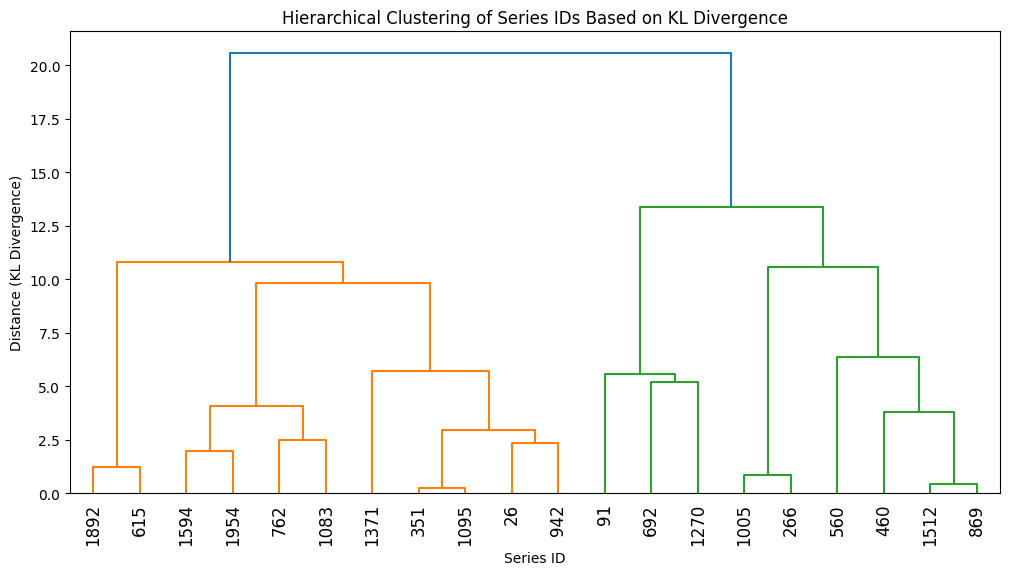

In [249]:
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform

# Convert to condensed distance matrix
kl_condensed = squareform(kl_matrix)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(kl_condensed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=kl_matrix.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Series IDs Based on KL Divergence")
plt.xlabel("Series ID")
plt.ylabel("Distance (KL Divergence)")
plt.show()


In [250]:
from scipy.cluster.hierarchy import fcluster

# Define the cut-off distance
cutoff_distance = 6

# Generate cluster labels based on the cut
clusters = fcluster(linkage_matrix, t=cutoff_distance, criterion='distance')

# Create a DataFrame to view which Series ID belongs to which cluster
cluster_df = pd.DataFrame({'Series ID': kl_matrix.index, 'Cluster': clusters})

# Display the clusters
print(cluster_df.sort_values(by='Cluster'))


   Series ID  Cluster
17      1892        1
18       615        1
19      1083        2
14       762        2
13      1954        2
8       1594        2
2         26        3
16      1095        3
4        351        3
10       942        3
11      1371        3
12      1270        4
0        692        4
9         91        4
6        266        5
3       1005        5
5        869        6
15       460        6
1       1512        6
7        560        7


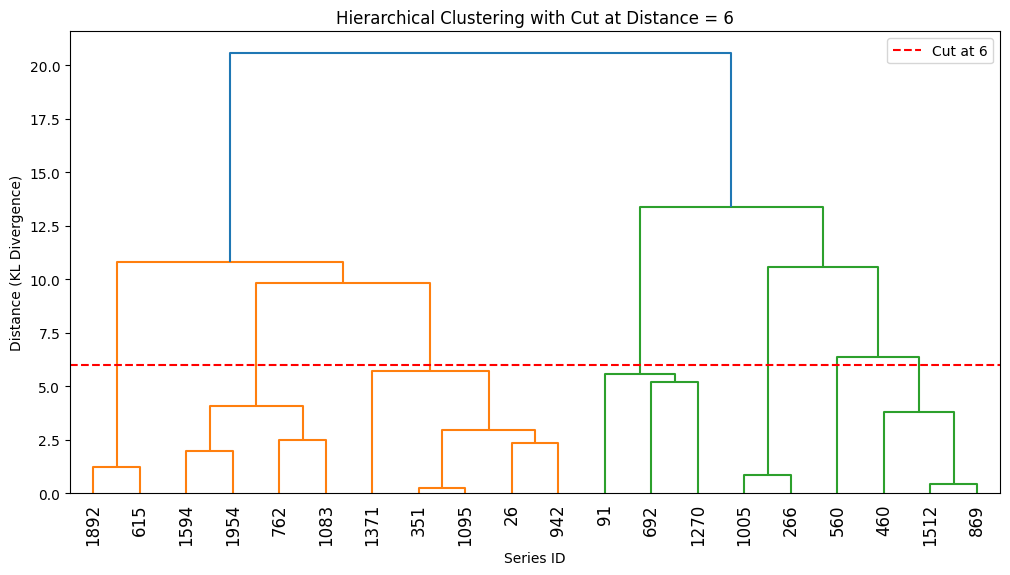

In [251]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(linkage_matrix, labels=kl_matrix.index, leaf_rotation=90)
plt.axhline(y=cutoff_distance, color='r', linestyle='--', label="Cut at 6")  # Add cut-off line
plt.title("Hierarchical Clustering with Cut at Distance = 6")
plt.xlabel("Series ID")
plt.ylabel("Distance (KL Divergence)")
plt.legend()
plt.show()


In [253]:
print(f"Number of clusters at distance {cutoff_distance}: {len(set(clusters))}")

Number of clusters at distance 6: 7


C:\Users\Mahmu\AppData\Local\Temp\ipykernel_18184\1023652634.py:6: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



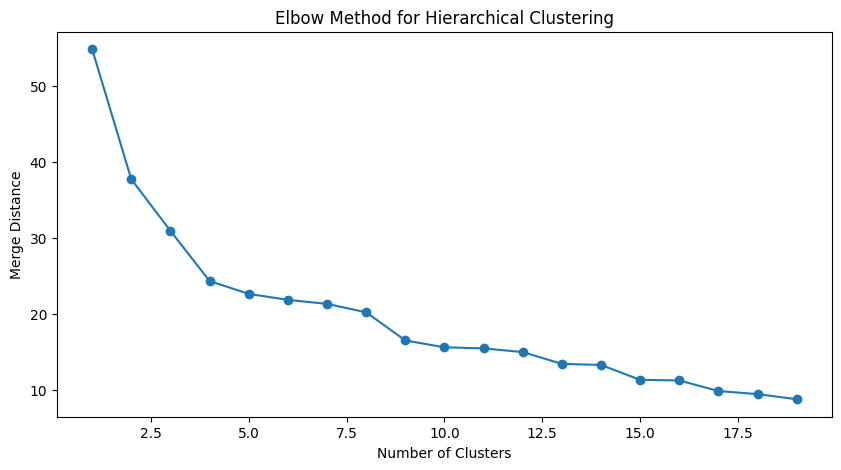

In [254]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Compute linkage matrix (if not already done)
linkage_matrix = sch.linkage(kl_matrix.values, method='ward')

# Compute the distances at which clusters are formed
distances = linkage_matrix[:, 2]

# Create an "elbow plot"
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(distances) + 1), distances[::-1], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Merge Distance")
plt.title("Elbow Method for Hierarchical Clustering")
plt.show()


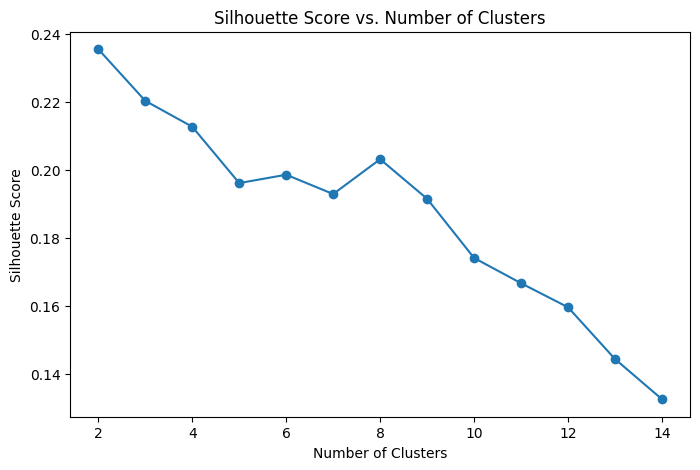

Optimal number of clusters: 2


In [255]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster

best_score = -1
best_k = None
scores = []

# Try different cluster counts
for k in range(2, 15):  # Adjust range based on dataset size
    labels = fcluster(linkage_matrix, k, criterion='maxclust')
    score = silhouette_score(kl_matrix.values, labels, metric='euclidean')
    scores.append(score)
    
    if score > best_score:
        best_score = score
        best_k = k

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 15), scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

print(f"Optimal number of clusters: {best_k}")


In [272]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

# Ensure Series_id is treated as a string
df['Series_id'] = df['Series_id'].astype(str)

# Select 100 random unique Series IDs
# choose field sample size with: https://www.calculator.net/sample-size-calculator.html?type=1&cl=95&ci=5&pp=50&ps=1000&x=Calculate
random_series_ids = np.random.choice(df['Series_id'].unique(), size=278, replace=False)

# Filter the dataframe to only include selected Series IDs
df_subset = df[df['Series_id'].isin(random_series_ids)]

# Function to estimate probability distributions
def estimate_distribution(series_values, bins=10):  # Reduce bins for speed
    hist, _ = np.histogram(series_values, bins=bins, density=True)
    hist += 1e-10  # Avoid zero probabilities
    return hist / hist.sum()  # Normalize

# Compute KL divergence matrix
kl_matrix = pd.DataFrame(index=random_series_ids, columns=random_series_ids, dtype=float)

for id1, id2 in itertools.combinations(random_series_ids, 2):
    p = estimate_distribution(df_subset[df_subset["Series_id"] == id1]["varde"])
    q = estimate_distribution(df_subset[df_subset["Series_id"] == id2]["varde"])
    
    kl_div = stats.entropy(p, q)  # KL Divergence
    kl_matrix.loc[id1, id2] = kl_div
    kl_matrix.loc[id2, id1] = kl_div  # Symmetric matrix

# Fill diagonal with 0 (self-divergence)
np.fill_diagonal(kl_matrix.values, 0)

# Convert to condensed distance matrix for clustering
condensed_distances = squareform(kl_matrix, checks=False)

# Perform hierarchical clustering
linkage_matrix = sch.linkage(condensed_distances, method='ward')

# Determine optimal clusters using Elbow Method
distances = linkage_matrix[:, 2]  # Extract distances from clustering
num_clusters = range(1, len(distances) + 1)

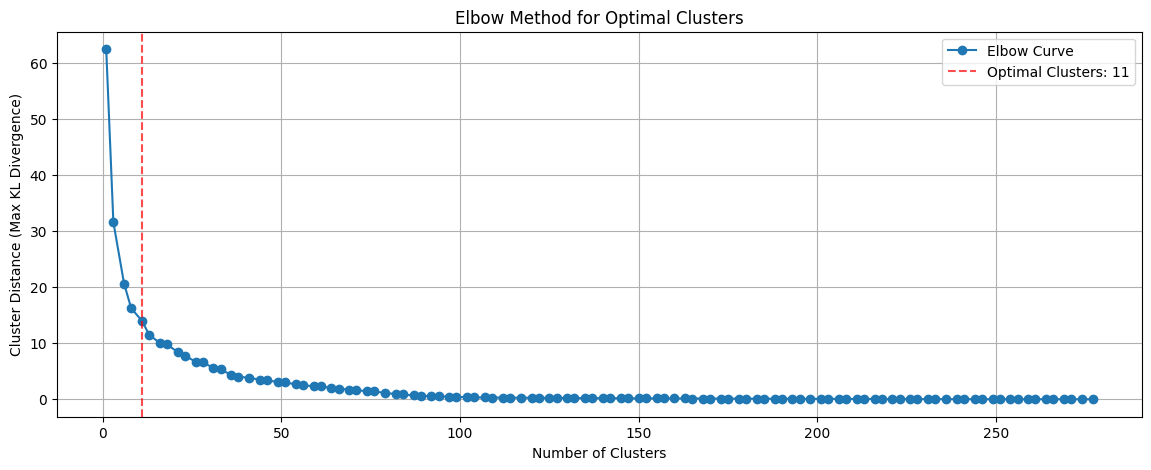

In [279]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 5))  # Make the plot wider

# Select 10% of points for plotting
perc = 0.4
num_samples = max(2, int(perc * len(distances)))  # Ensure at least 2 points
indices = np.linspace(0, len(distances) - 1, num_samples, dtype=int)  # Evenly spaced indices

x_values = np.array(range(1, len(distances) + 1))[indices]  # X-axis (cluster count)
y_values = distances[::-1][indices]  # Y-axis (cluster distances)

plt.plot(x_values, y_values, marker='o', linestyle='-', label="Elbow Curve")

# **Mark the second plotted point with a legend**
if len(x_values) > 1:
    second_x = x_values[4]
    plt.axvline(x=second_x, color='red', linestyle='--', alpha=0.7, label=f'Optimal Clusters: {second_x}')

plt.xlabel("Number of Clusters")
plt.ylabel("Cluster Distance (Max KL Divergence)")
plt.title("Elbow Method for Optimal Clusters")
plt.grid()
plt.legend()  # Add legend here
plt.show()


In [302]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the KL divergence values using Min-Max Scaling (0-1 range)
scaler = MinMaxScaler()
kl_matrix_norm = scaler.fit_transform(kl_matrix)

normalized_df = pd.DataFrame(kl_matrix_norm, index=random_series_ids, columns=random_series_ids)
normalized_df


,836,812,416,1144,1511,14,374,835,969,1485,...,862,1765,1915,803,73,202,1450,1166,1743,943
836,0.000000,0.080670,0.144192,0.080858,0.747680,0.747680,0.069296,0.078361,0.092085,0.072023,...,0.099305,0.087480,0.078057,0.086244,0.087771,0.096358,0.090357,0.167850,0.145508,0.018421
812,0.085588,0.000000,0.214087,0.205080,0.793262,0.793262,0.196459,0.383913,0.549447,0.197532,...,0.252004,0.546951,0.291116,0.220241,0.226036,0.458943,0.226595,0.227580,0.366097,0.393180
416,0.157477,0.220377,0.000000,0.160077,0.816569,0.816569,0.147529,0.169048,0.204278,0.148846,...,0.215474,0.195722,0.170599,0.177430,0.174703,0.104592,0.177524,0.097112,0.158948,0.169532
1144,0.087195,0.208446,0.158060,0.000000,0.806281,0.806281,0.004747,0.100582,0.232677,0.019475,...,0.067727,0.241607,0.101317,0.021005,0.023114,0.245175,0.022404,0.117693,0.100254,0.198526
1511,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.894854,0.111758,0.079013,0.886816,...,0.158416,0.139665,1.000000,1.000000,1.000000,0.139674,1.000000,1.000000,1.000000,0.215362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.076596,0.343856,0.076127,0.180728,0.083014,0.083014,0.167107,0.078322,0.015094,0.249695,...,0.849984,0.010314,0.299500,0.338721,0.375842,0.000000,0.232982,0.162197,0.215996,0.148491
1450,0.088526,0.209247,0.159253,0.020355,0.732529,0.732529,0.011305,0.085971,0.268835,0.005059,...,0.248873,0.109031,0.024618,0.093768,0.005474,0.287153,0.000000,0.168439,0.235138,0.578055
1166,0.169163,0.216181,0.089615,0.109993,0.753529,0.753529,0.100556,0.094512,0.280258,0.074801,...,0.506377,0.116037,0.318941,0.273126,0.085958,0.205640,0.173268,0.000000,0.366097,0.804657
1743,0.143009,0.339132,0.143038,0.091370,0.734834,0.734834,0.079237,0.070466,0.250218,0.118721,...,0.724965,0.083731,0.294393,0.333018,0.220286,0.267054,0.235878,0.357014,0.000000,0.211150


In [307]:
# Specify the desired number of clusters
num_clusters = 12

# Generate cluster labels based on the desired number of clusters
clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Create a DataFrame to view which Series ID belongs to which cluster
cluster_df = pd.DataFrame({'Series_id': kl_matrix.index, 'Cluster': clusters})

# Display the clusters
print(cluster_df.sort_values(by='Cluster'))


    Series_id  Cluster
4        1511        1
5          14        1
70       1755        1
199       181        1
210       218        1
..        ...      ...
171      1624       12
170       434       12
161       991       12
228      1364       12
277       943       12

[278 rows x 2 columns]


In [322]:
# Drop 'Cluster_id' if it already exists to prevent duplicates
if 'Cluster_id' in df_subset.columns:
    df_subset = df_subset.drop(columns=['Cluster_id'])

# Merge df_subset with cluster_df on 'Series_id' to assign 'Cluster_id'
df_subset = df_subset.merge(cluster_df, on='Series_id', how='left')

# Rename the column for clarity
df_subset.rename(columns={'Cluster': 'Cluster_id'}, inplace=True)

# Display the updated dataframe
df_subset.head()


,ekologisk,groda,skadegorare,graderingsdatum,utvecklingsstadium,varde,Series_id,week,geometry,Cluster_id
0,False,Höstvete,Svartpricksjuka,2016-05-02,25.0,0.00,12,18,POINT (18.208671551471568 57.54864717757017),11
1,False,Höstvete,Svartpricksjuka,2016-05-09,31.0,0.01,12,19,POINT (18.208671551471568 57.54864717757017),11
2,False,Höstvete,Svartpricksjuka,2016-05-23,32.0,0.01,12,21,POINT (18.208671551471568 57.54864717757017),11
3,False,Höstvete,Svartpricksjuka,2016-06-06,57.0,0.00,12,23,POINT (18.208671551471568 57.54864717757017),11
4,False,Höstvete,Svartpricksjuka,2016-06-13,59.0,0.00,12,24,POINT (18.208671551471568 57.54864717757017),11


In [ ]:
vals1 = np.unique(df_subset['Series_id'])
print(vals1.shape)

vals2 = np.unique(df_subset['Cluster_id'])
print(vals2.shape)